In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

import scipy.stats as sts
%matplotlib inline

1.Загрузить файл hr.csv.

In [3]:
data=pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [7]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [24]:
cor_matrix = data.corr(method = "pearson").round(2)
cor_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


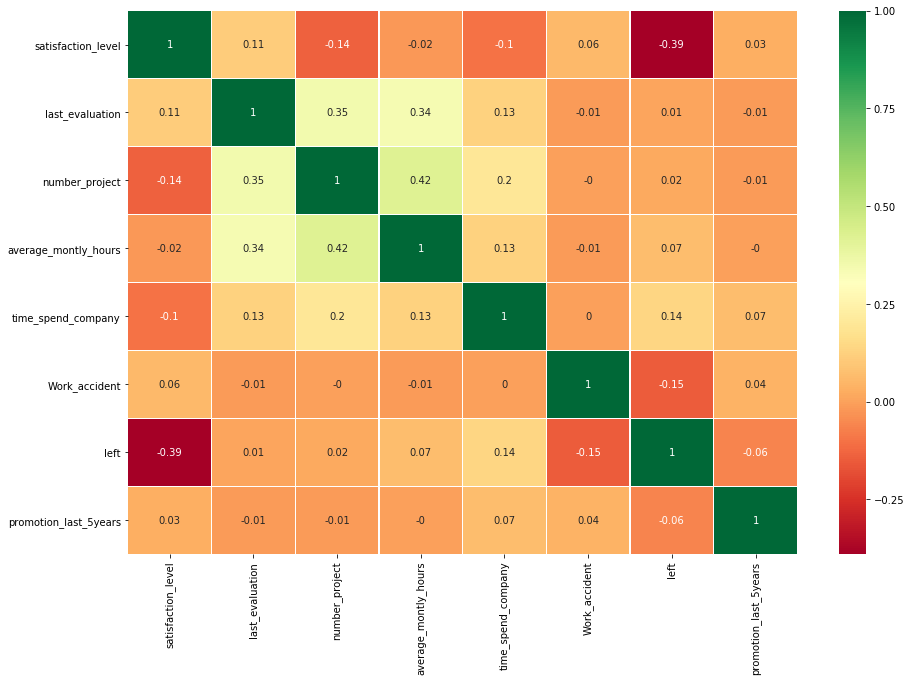

In [34]:
sns.heatmap(cor_matrix, annot = True, cmap = "RdYlGn", linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(15,10)

4.Визуализировать несколько взаимосвязей между переменными.

/Users/erik/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


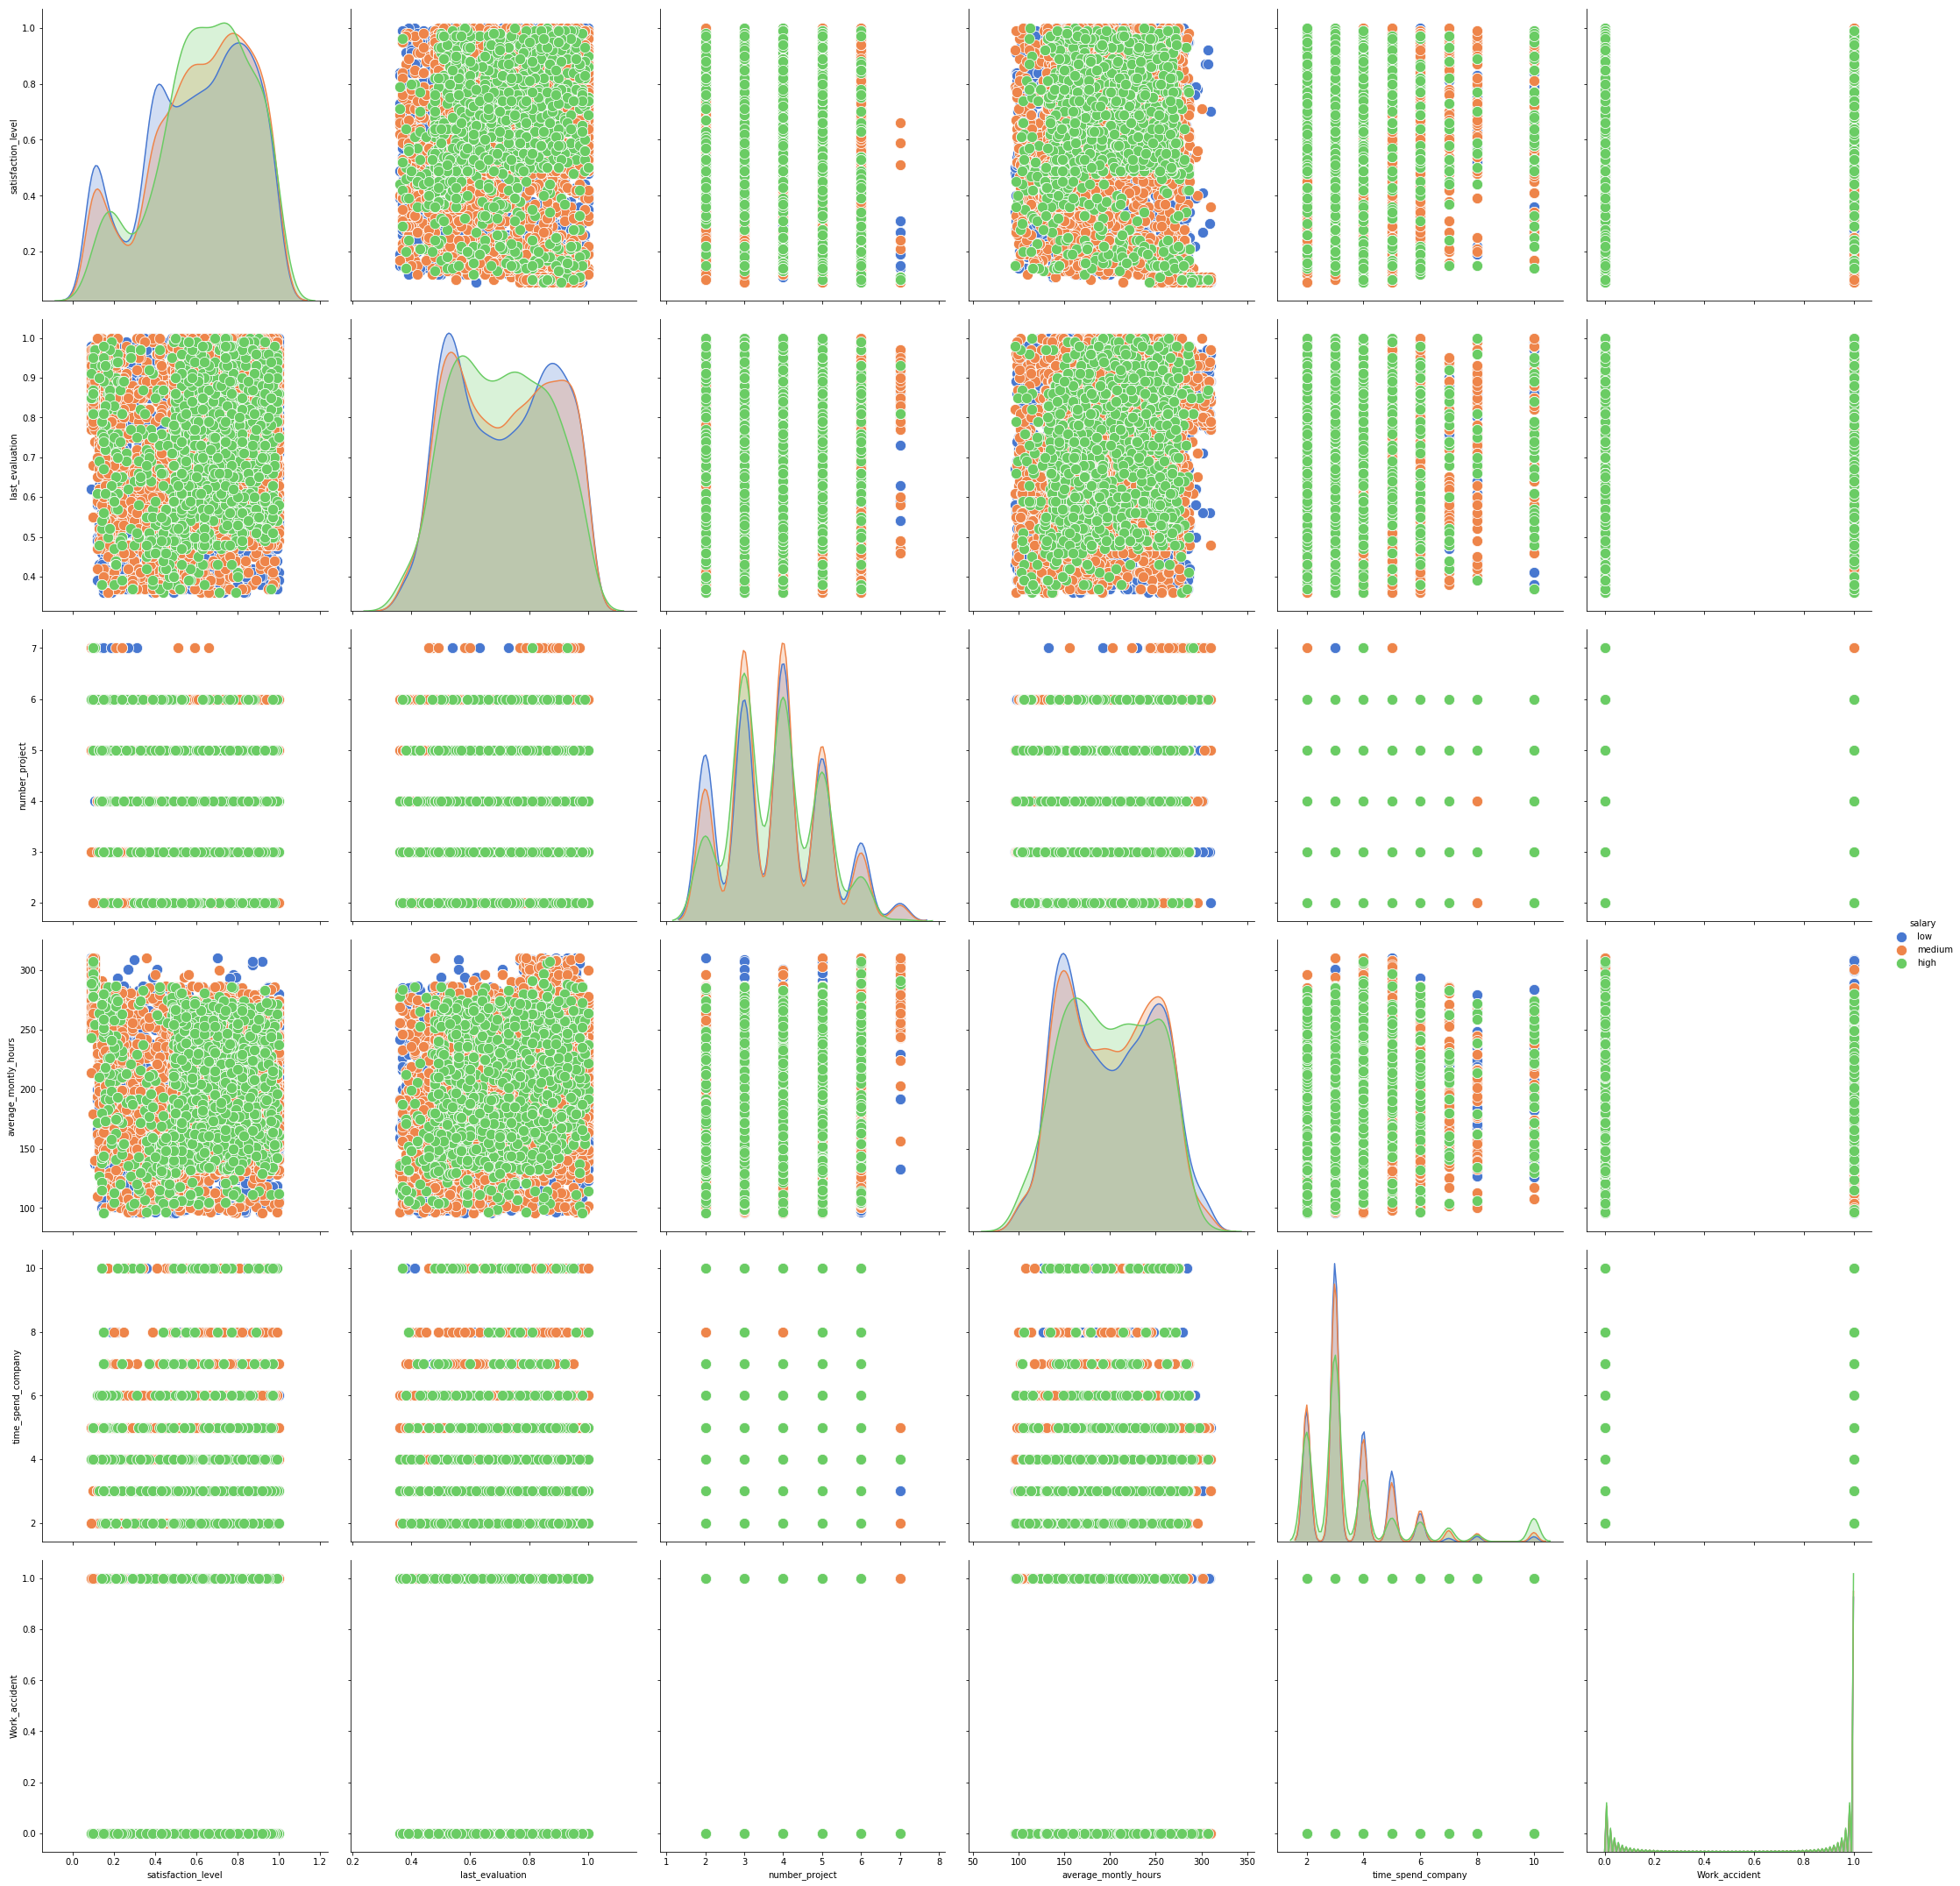

In [38]:
sns.pairplot(data=data[['satisfaction_level',  'last_evaluation', 'number_project', 'average_montly_hours','time_spend_company',"Work_accident", "salary" ]], hue='salary', palette = 'muted',
                 size=5.,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=150) )


In [ ]:
#Ни в матрице кореляций, ни на визуализированых графиках - корелляция не наблюдается.

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [ ]:
#1) Проверяем имеется ли разница в среднем количестве рабочих проэктов между людьми с низкой и высокой зарплатой

In [39]:
data.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [41]:
data_high_paid=data[data['salary'] == 'high']
data_high_paid.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
72,0.45,0.49,2,149,3,0,1,0,product_mng,high
111,0.09,0.85,6,289,4,0,1,0,hr,high
189,0.44,0.51,2,156,3,0,1,0,technical,high
267,0.45,0.53,2,129,3,0,1,0,technical,high
306,0.37,0.46,2,149,3,0,1,0,marketing,high


In [42]:
data_low_paid=data[data['salary'] == 'low']
data_low_paid.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low


In [46]:
print(data_high_paid.shape)
print(data_low_paid.shape)

(1237, 10)
(7316, 10)


In [58]:
stats.ttest_ind(data_high_paid['number_project'].sample(n=1200), data_low_paid['number_project'].sample(n=1200))

Ttest_indResult(statistic=-0.4773048569202432, pvalue=0.6331885503392587)

In [ ]:
# p.value > 0.05 мы не можем отвергнуть нулевую теорию о том что средние значения в 2х выборках идентичны 

In [ ]:
# 2) Проверим имеется ли разница в среднем значении удовлетворенности между людьми с высокой и низкой зарплатой

In [59]:
stats.ttest_ind(data_high_paid['satisfaction_level'].sample(n=1200), data_low_paid['satisfaction_level'].sample(n=1200))

Ttest_indResult(statistic=2.913943429504716, pvalue=0.003601985478797997)

In [ ]:
# p.value < 0.05 - делаем вывод что мы отвергаем гипотезу о том что средние значения удовлетворенности работой одинаковы

6.Рассчитать сколько работников работает в каждом департаменте.

In [61]:
data.head()
data.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

7.Показать распределение сотрудников по зарплатам.

In [89]:
new_data = data.groupby("salary").count()["sales"].reset_index().sort_values('sales', ascending=False)
new_data

,salary,sales
1,low,7316
2,medium,6446
0,high,1237


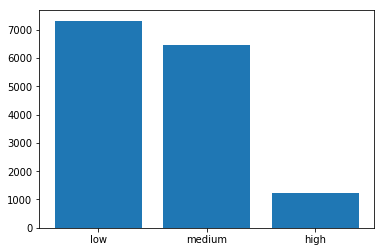

In [94]:
graph = plt.gca()
graph.bar(new_data["salary"], new_data["sales"])

plt.show()

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

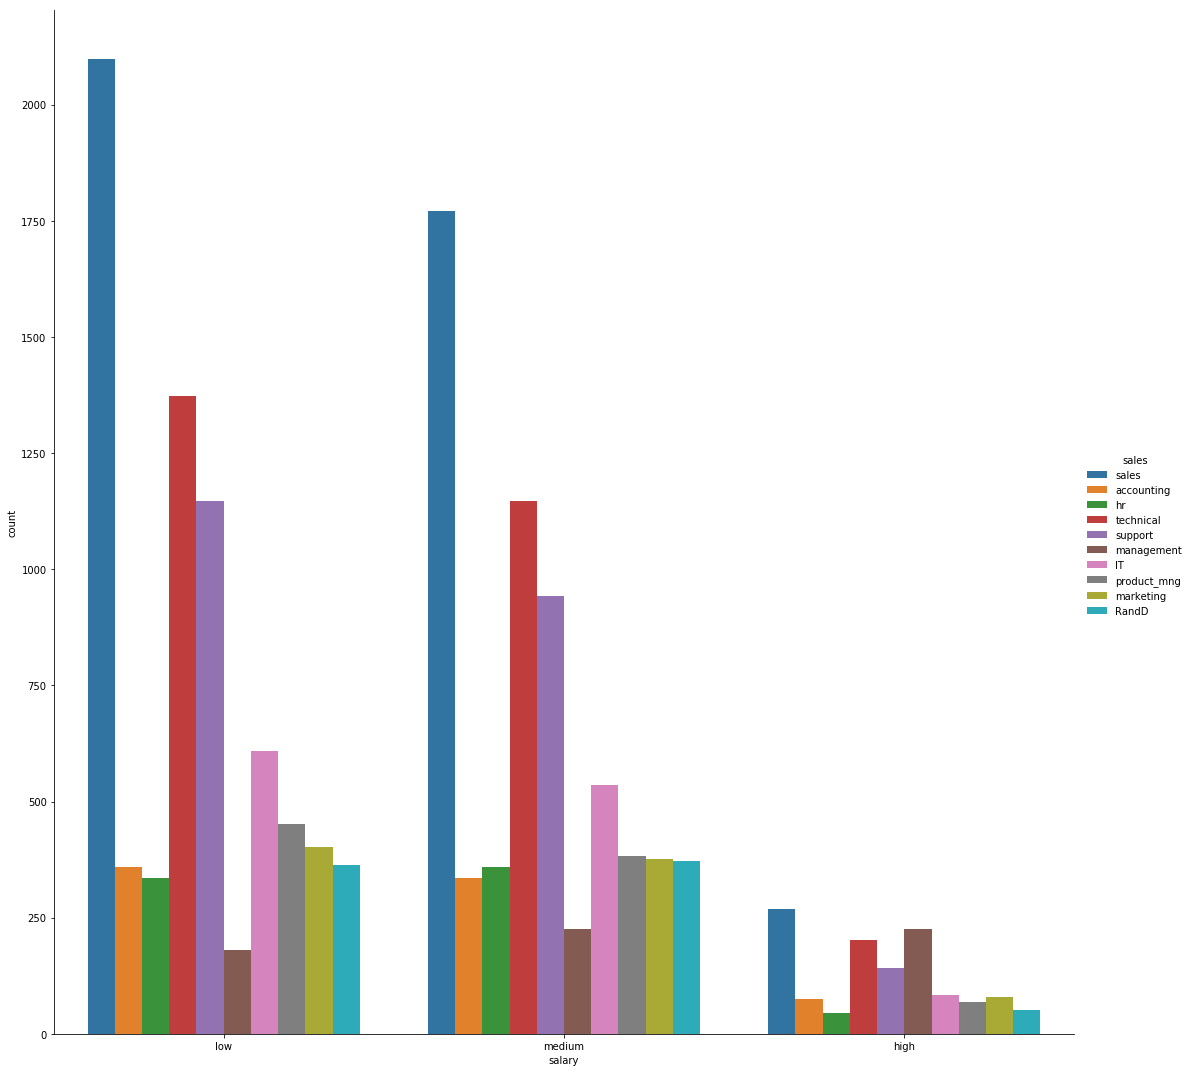

In [95]:
sns.catplot(x="salary", hue="sales", kind="count",
            data=data, height=15);

9.Сколько сотрудников покинули компанию.

In [99]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
# Уволилось 3571 человек

10.Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию.

In [100]:
# Предположим что уволившиесе увольняются изза неудовлетворенности / изза низкой зарплаты / изза отсутствия повышений и проверим 
# эти гипотезы

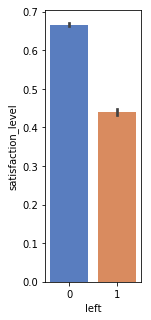

In [120]:
plt.figure(figsize=(10,5))
plt.subplot(1, 5, 1)
sns.barplot(x='left',y='satisfaction_level',data=data,palette='muted')

plt.show()

In [ ]:
# из графика видим что те кто уволился гораздо больше не довольны работой чем те кто остался, но это и так логично

In [ ]:
# Добавим в этот график распределение по зарплатам чтобы понимать или увольняются из-за низки зарплат

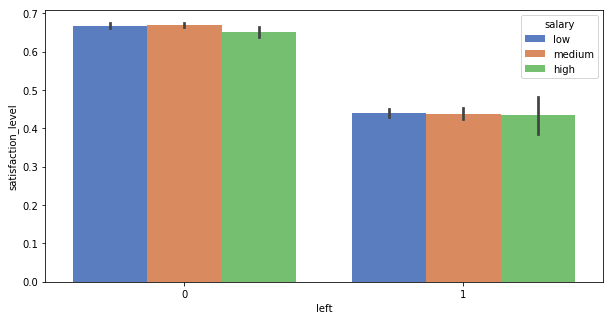

In [121]:
plt.figure(figsize=(10,5))
sns.barplot(x='left',y='satisfaction_level',data=data,hue='salary',palette='muted')
plt.show()

In [ ]:
# из графика видим что уровень зарплаты практически не влияет, значит стоит проверить условия работы - количество отработанных часов
# и количество повышений

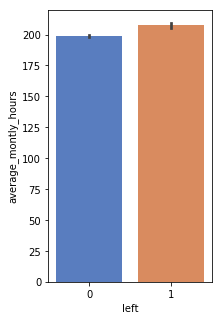

In [123]:
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
sns.barplot(x='left',y='average_montly_hours',data=data,palette='muted')
plt.show()

In [124]:
#те кто уволился работают немного больше других (либо им тяжелее дается работа 
#либо они наоброт амбициозные и стараются выкладываться и не видят на этом месте перспектив)
#Проверим как влияют повышения на желание людей работать и увольняться

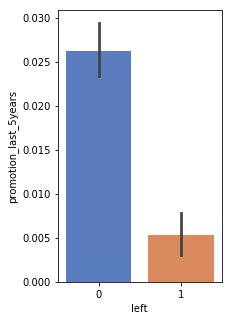

In [125]:
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
sns.barplot(x='left',y='promotion_last_5years',data=data,palette='muted')
plt.show()

In [ ]:
# Здесь четко видно что увольняются те которые не получали повышений.
# Посмотрим как эта информация соотносится с количеством отработанных часов

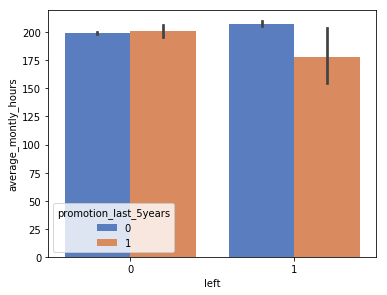

In [137]:
plt.figure(figsize=(20,10))
plt.subplot(2, 3, 2)
sns.barplot(x='left',y='average_montly_hours',hue ="promotion_last_5years" ,data=data,palette='muted')
plt.show()

In [ ]:
# Самый большой класс это те кого не повышали и они уволились. Также есть класс людей которые меньше работают, которых повышали 
# но однако они все равно уволились - тоесть работали они хорошо
# Возникает подозрение что это бесперспективное место для работа где уровень зп не соответствует рыночному или отсутствуют перспективы
# для роста

# Посмотрим как распеределяются повышения на количество отработанных в компании лет

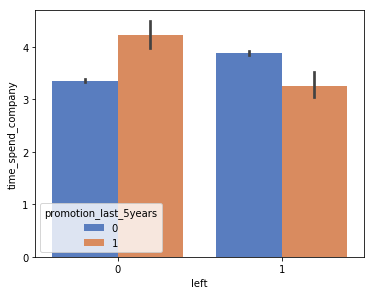

In [138]:
plt.figure(figsize=(20,10))
plt.subplot(2, 3, 2)
sns.barplot(x='left',y='time_spend_company',hue ="promotion_last_5years" ,data=data,palette='muted')
plt.show()

In [140]:
# Согласно проведенному анализу можно сделать выводы что люди увольняются изза неудовлетворенности ключевым фактором - повышения.
# Дольше всего в компании работают те кто получал повышения но есть огромное количество людей которое долго работает и ничего 
# не получает.

# Также примечательно было заметить что был класс людей которые получали повышение но они уволились и работали меньше всего. Это
# меня натолкнуло на мысль что они понимали что место бесперспективное для развития карьеры и работали лишь бы и при первой 
# возможности уйти - ушли.